In [4]:
import sklearn

In [5]:
sklearn.__version__

'0.24.0'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(columns=['casado','comprou'])
df

,casado,comprou


In [3]:
df.loc[0,:] = ['Sim',1]
df.loc[1,:] = ['Sim',1]
df.loc[2,:] = ['Não',1]
df.loc[3,:] = ['Sim',0]
df.loc[4,:] = ['Não',0]
df.loc[5,:] = ['Não',1]
df.loc[6,:] = ['Sim',1]
df.loc[7,:] = ['Não',0]

df

,casado,comprou
0,Sim,1
1,Sim,1
2,Não,1
3,Sim,0
4,Não,0
5,Não,1
6,Sim,1
7,Não,0


In [6]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

enc.fit_transform(df)

array([[1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.]])

In [7]:
enc.categories_

[array(['Não', 'Sim'], dtype=object), array([0, 1], dtype=object)]

In [8]:
df.columns

Index(['casado', 'comprou'], dtype='object')

In [9]:
df_pre = pd.DataFrame(enc.fit_transform(df), columns=df.columns, dtype=int)
df_pre

,casado,comprou
0,1,1
1,1,1
2,0,1
3,1,0
4,0,0
5,0,1
6,1,1
7,0,0


In [10]:
X = df_pre[['casado']]
X

,casado
0,1
1,1
2,0
3,1
4,0
5,0
6,1
7,0


In [11]:
df_pre['casado']

0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    0
Name: casado, dtype: int64

In [12]:
df_pre.casado

0    1
1    1
2    0
3    1
4    0
5    0
6    1
7    0
Name: casado, dtype: int64

In [13]:
y = df_pre.comprou
y

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    0
Name: comprou, dtype: int64

In [14]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB(alpha=0)

cnb.fit(X,y)

/home/rafael/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0)

In [15]:
para_predizer = pd.DataFrame(columns=['casado'])
para_predizer.loc[0,:] = [0]
para_predizer.loc[1,:] = [1]
para_predizer

,casado
0,0.0
1,1.0


In [16]:
cnb.predict_proba(para_predizer)

array([[0.5 , 0.5 ],
       [0.25, 0.75]])

# O que o nosso tinha dado na aula?

<img src="slide_naivebayes.png" />

# Problema de verdade

In [17]:
df = pd.read_csv('base_categoricalnb.csv')
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,services,married,high.school,no,no,yes,telephone,may,mon,no
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,yes


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('y',axis=1)
y = df.y

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)

In [21]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X_tr2 = pd.DataFrame(enc.fit_transform(X_tr), columns=X_tr.columns, dtype=int)
X_tr2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,1,1,1,1,2,0,0,3,3
1,4,1,6,0,0,0,1,4,3
2,7,0,3,0,2,2,0,7,1
3,4,0,6,0,2,0,1,6,3
4,9,1,2,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...
28826,11,1,7,0,2,0,0,9,4
28827,1,1,5,1,0,2,1,6,3
28828,8,2,3,0,1,1,0,1,3
28829,0,2,3,0,0,0,0,0,2


In [22]:
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object)]

In [25]:
X_ts2 = pd.DataFrame(enc.transform(X_ts),columns=X_ts.columns,dtype=int)
X_ts2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,0,1,6,0,2,2,0,3,4
1,5,1,0,1,2,0,1,6,2
2,7,2,3,0,2,0,0,6,3
3,10,1,3,0,0,2,1,6,2
4,1,1,1,0,2,0,1,6,3
...,...,...,...,...,...,...,...,...,...
12352,2,2,6,1,2,0,1,4,0
12353,0,2,3,0,0,0,0,3,2
12354,9,2,5,0,2,0,0,1,1
12355,4,2,6,0,2,2,1,6,3


In [30]:
from sklearn.preprocessing import LabelEncoder

enc2 = LabelEncoder()

y_tr2 = enc2.fit_transform(y_tr)
y_tr2

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
y_ts2 = enc2.transform(y_ts)
y_ts2

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
y_tr.replace('no',0).replace('yes',1)

12762    0
8278     0
24236    0
6284     0
40785    1
        ..
38020    1
4392     0
40543    1
28760    0
31691    0
Name: y, Length: 28831, dtype: int64

In [34]:
cnb2 = CategoricalNB(alpha=0)
cnb2.fit(X_tr2,y_tr2)

/home/rafael/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0)

In [39]:
X_ts2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,0,1,6,0,2,2,0,3,4
1,5,1,0,1,2,0,1,6,2
2,7,2,3,0,2,0,0,6,3
3,10,1,3,0,0,2,1,6,2
4,1,1,1,0,2,0,1,6,3
...,...,...,...,...,...,...,...,...,...
12352,2,2,6,1,2,0,1,4,0
12353,0,2,3,0,0,0,0,3,2
12354,9,2,5,0,2,0,0,1,1
12355,4,2,6,0,2,2,1,6,3


In [38]:
pred = cnb2.predict_proba(X_ts2)
pred

array([[0.82459352, 0.17540648],
       [0.97221911, 0.02778089],
       [0.91123809, 0.08876191],
       ...,
       [0.81793751, 0.18206249],
       [0.9515477 , 0.0484523 ],
       [0.97593682, 0.02406318]])

In [40]:
pred.shape

(12357, 2)

In [41]:
np.linspace(0,1,30)

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [45]:
y_ts2

array([0, 0, 0, ..., 0, 0, 0])

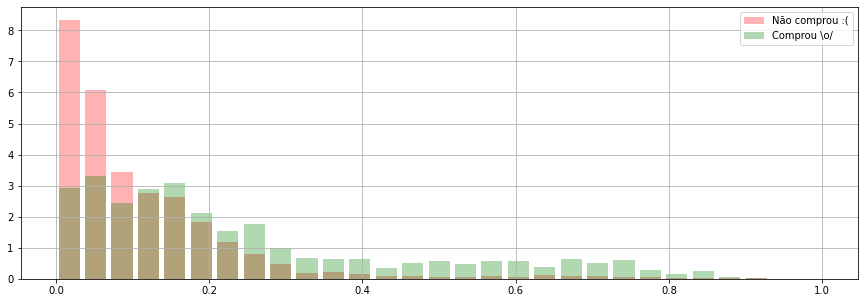

In [47]:
plt.figure(figsize=(15,5))

plt.hist(pred[y_ts2==0,1], bins=np.linspace(0,1,30), color='r', alpha=.3, rwidth=.80, density=True, label='Não comprou :(')
plt.hist(pred[y_ts2==1,1], bins=np.linspace(0,1,30), color='g', alpha=.3, rwidth=.80, density=True, label='Comprou \o/')

plt.legend()
plt.grid()

# E o alpha?

<img src="naivebayes_contagem.png" />

In [48]:
X = df_pre[['casado']]
y = df_pre.comprou

cnb = CategoricalNB(alpha=0, min_categories=3)

cnb.fit(X,y)

/home/rafael/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


CategoricalNB(alpha=0, min_categories=3)

In [49]:
para_predizer = pd.DataFrame(columns=['casado'])
para_predizer.loc[0,:] = [2]
para_predizer

,casado
0,2


In [50]:
cnb.predict_proba(para_predizer)

array([[0.5, 0.5]])

# Faz sentido?

In [57]:
X = df_pre[['casado']]
y = df_pre.comprou

cnb = CategoricalNB(alpha=200, min_categories=3)

cnb.fit(X,y)

CategoricalNB(alpha=200, min_categories=3)

In [58]:
cnb.predict_proba(para_predizer)

array([[0.3757764, 0.6242236]])

# Pois no treino, POR PADRÃO, eu tenho mais 1s que 0s. Em particular:

 - y=sim, eu tenho 5/8 = 0.625
 - y=não, eu tenho 3/8 = 0.375
 
Assim fica um pouco "mais próximo" da realidade de "não saber nada"